In [114]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')


In [115]:
df = pd.read_csv('cleaned-commit-info.csv')

In [116]:
del df['Unnamed: 0']

In [117]:
df[df.repo=='areadetector/adcore'].authors.unique()

array(['markrivers', 'timmmooney', 'mdmoo1978', 'ulrikpedersen', 'oirled',
       'ajgdls', 'aglowacki', 'edwarrick', 'prjemian', 'keenanlang',
       'nicholasrees', 'jlmuir', 'mp49', 'bhill-slac', 'xiaoqiangwang',
       'unknown', 'jabrnthy', 'roehrig', 'anjohnson', 'epics', 'mrkraimer',
       'rivers', 'mooney', 'gebhardt', 'jemian', 'mwpearson', 'kpetersn',
       'hammonds'], dtype=object)

In [118]:
len(df[df.authors == 'dchabot'])

176

In [119]:
df.head()

,authors,committers,dates,messages,repo,shas
0,ericdill,Eric Dill,2015-09-22T13:54:22Z,Merge pull request #342 from chuckie82/contrib...,scikit-xray/scikit-xray,bd24fbbc7914d0d13ef8e1e2a92e3d8b404d1880
1,ericdill,Eric Dill,2015-09-22T13:54:06Z,Merge pull request #343 from chuckie82/dockerf...,scikit-xray/scikit-xray,636aed899eaa4a561752d7cf8e95881ee7af9af0
2,chuck,Chuck,2015-09-22T00:55:18Z,Fix sphinx syntax,scikit-xray/scikit-xray,882af16373f545681fb1f8ab5828b7e391e27026
3,chuck,Chuck,2015-09-22T00:05:58Z,Fixed slash and comment,scikit-xray/scikit-xray,2d0eee4f09f26812d767337a2f8ca73ff66c48ed
4,chuck,Chuck,2015-09-21T22:39:05Z,Added a Dockerfile for running skxray on any m...,scikit-xray/scikit-xray,493895f44c24ac05b5e54185f1a331baa25f5fe7


In [120]:
ymds = [date[:10] for date in df.dates]
last_six_months = ['2014-01-01' <= ymd <= '2016-01-01' for ymd in ymds]
last_six_months = df[last_six_months]

In [121]:
authors = list([str(author) for author in last_six_months.authors.unique()])
repos = list(last_six_months.repo.unique())

In [122]:
len(last_six_months)

77096

In [123]:
users_of_interest = [
    'ericdill',
    'tacaswell',
    'danielballan',
    'CJ-Wright',
    'afluerasu',
    'arkilic',
    'brunoseivam',
    'cowanml',
    'dchabot',
    'giltis',
    'gjwillms',
    'kevinrknox',
    'klauer',
    'licode',
    'pavoljuhas',
    'sameera2004',
    'stuwilkins',
    'waynelewis',
    'yugangzhang'
]


In [124]:
last_six_months = last_six_months[[str(author) in users_of_interest for author in last_six_months.authors]]

In [125]:
last_six_months.groupby('repo').agg(len)

,authors,committers,dates,messages,shas
repo,,,,,
areadetector/adfastccd,132,132,132,132,132
arkilic/mdsbenchmark,5,5,5,5,5
arkilic/metadatastore,1,1,1,1,1
arkilic/v4table_example,2,2,2,2,2
cowanml/lsdc,140,140,140,140,140
cowanml/samplemanager,99,99,99,99,99
cowanml/samplemangler,46,46,46,46,46
danielballan/blog,3,3,3,3,3
danielballan/channelarchiver,1,1,1,1,1


In [126]:
last_six_months.groupby('authors').agg(len)

,committers,dates,messages,repo,shas
authors,,,,,
afluerasu,1,1,1,1,1
arkilic,529,529,529,529,529
brunoseivam,1,1,1,1,1
cowanml,291,291,291,291,291
danielballan,2018,2018,2018,2018,2018
dchabot,160,160,160,160,160
ericdill,2167,2167,2167,2167,2167
giltis,126,126,126,126,126
gjwillms,27,27,27,27,27


In [127]:
non_merge = last_six_months[['merge' not in str(msg).lower() for msg in last_six_months.messages]]
merge = last_six_months[['merge' in str(msg).lower() for msg in last_six_months.messages]]

In [128]:
def clean_dataframe(df, min_contributor_commits=25, min_repo_size=25):
            
    # squash beamline specific projects into one row
    beamline_summaries = {}
    for blid in ['csx', 'hxn', 'xpd', 'srx', 'ixs', 'chx']:
        bl_rows = [('nsls-ii-%s' % blid) in row_name for row_name in df.index]
        print('nsls-ii-%s has %s repos that are being merged.\n%s\n' 
              % (blid, len([row for row in bl_rows if row]), list(df.index[bl_rows])))
        series = df.ix[bl_rows].sum()
        df = df.ix[[not row for row in bl_rows]]
        beamline_summaries['%s specific repos' % blid] = series
    squashed_beamline_repos = pd.DataFrame(beamline_summaries).T
    
    # squash repos with < `min_repo_size` commits into one row
    minimum_commits = min_repo_size
    small_rows = [df.ix[row].sum() < minimum_commits for row in df.index]
    small_row_names = df.index[small_rows]
    series = df.ix[small_rows].sum()
    df = df.ix[[not row for row in small_rows]]
    small_repos = pd.DataFrame({'small-repos': series}).T
    
    # concatenate the manipulated dataframes together
    squashed = pd.concat([df, squashed_beamline_repos, small_repos])
    
    # ignore people with less than `min_contributor_commits` commits
    ignored_contributors = []
    for col in squashed:
        if squashed[col].sum() < min_contributor_commits:
            ignored_contributors.append(col)
            del squashed[col]
    
    print('%s repos are being combined into the "small-repos" row because they have less than '
          '%s commits in the dataset\n%s\n' % (len(small_row_names), min_repo_size, list(small_row_names)))
    print('%s contributors are being ignored because they have less than %s commits\n%s' 
          % (len(ignored_contributors), min_contributor_commits, list(ignored_contributors)))
    return squashed

In [129]:
nonmerge_commits_by_repo = {author: non_merge[non_merge.authors==author].groupby('repo').agg(len).messages for author in authors}
nonmerge_commits_by_repo = clean_dataframe(pd.DataFrame(nonmerge_commits_by_repo))

nsls-ii-csx has 22 repos that are being merged.
['nsls-ii-csx/acopian', 'nsls-ii-csx/baffleslits', 'nsls-ii-csx/caautoconfig', 'nsls-ii-csx/calibration', 'nsls-ii-csx/conda-recipes', 'nsls-ii-csx/csxtools', 'nsls-ii-csx/fastccdconfig', 'nsls-ii-csx/lakeshore336', 'nsls-ii-csx/libcin', 'nsls-ii-csx/logbook', 'nsls-ii-csx/lupit', 'nsls-ii-csx/nsls-ii-csx.github.io', 'nsls-ii-csx/nsls2notifyme', 'nsls-ii-csx/omegam4061', 'nsls-ii-csx/ophyd', 'nsls-ii-csx/pyvlspgm', 'nsls-ii-csx/qcinview', 'nsls-ii-csx/stanforddg645', 'nsls-ii-csx/testioc', 'nsls-ii-csx/timestamp', 'nsls-ii-csx/undcontrol', 'nsls-ii-csx/vlspgm']

nsls-ii-hxn has 3 repos that are being merged.
['nsls-ii-hxn/hxntools', 'nsls-ii-hxn/ipython_ophyd', 'nsls-ii-hxn/pyxrf']

nsls-ii-xpd has 1 repos that are being merged.
['nsls-ii-xpd/ipython_ophyd']

nsls-ii-srx has 4 repos that are being merged.
['nsls-ii-srx/controlsui', 'nsls-ii-srx/ipython_ophyd', 'nsls-ii-srx/nsls2-xf-utils', 'nsls-ii-srx/srxtools']

nsls-ii-ixs has 0 repos 

The row labels below are somewhat misleading.  Many of them come from my personal forks of stuff and not from the canonical repository.  This is mostly because github wouldn't let me pull down any more information for the time being :(  Apparently you can only have 500 requests per hour via their API and I exceeded that. I will update to be more accurate as time permits!

In [130]:
nonmerge_commits_by_repo.sum()

arkilic          489
cowanml          264
danielballan    1617
dchabot          137
ericdill        1915
giltis           104
gjwillms          27
klauer           498
licode           542
pavoljuhas       140
sameera2004      340
stuwilkins       821
tacaswell       2305
dtype: float64

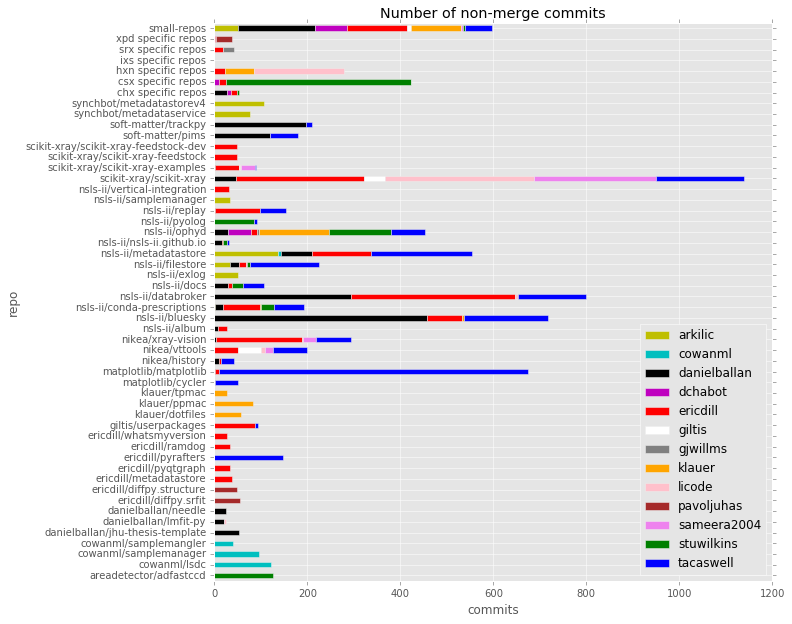

In [131]:
fig, ax = plt.subplots(figsize=(10,10))
cycle = ['y', 'c', 'k', 'm', 'r', 'white', 'gray', 'orange', 'pink', 'brown', 'violet', 'green', 'blue']
nonmerge_commits_by_repo.plot(kind='barh', stacked=True, ax=ax, color=cycle, title="Number of non-merge commits")
ax.set_xlabel('commits')
plt.show()

In [132]:
merge_commits_by_repo = {author: merge[merge.authors==author].groupby('repo').agg(len).messages for author in authors}
merge_commits_by_repo = clean_dataframe(pd.DataFrame(merge_commits_by_repo), min_contributor_commits=5, min_repo_size=5)

nsls-ii-csx has 5 repos that are being merged.
['nsls-ii-csx/caautoconfig', 'nsls-ii-csx/csxtools', 'nsls-ii-csx/libcin', 'nsls-ii-csx/undcontrol', 'nsls-ii-csx/vlspgm']

nsls-ii-hxn has 1 repos that are being merged.
['nsls-ii-hxn/pyxrf']

nsls-ii-xpd has 1 repos that are being merged.
['nsls-ii-xpd/ipython_ophyd']

nsls-ii-srx has 0 repos that are being merged.
[]

nsls-ii-ixs has 0 repos that are being merged.
[]

nsls-ii-chx has 1 repos that are being merged.
['nsls-ii-chx/chxtools']

32 repos are being combined into the "small-repos" row because they have less than 5 commits in the dataset
['arkilic/mdsbenchmark', 'cowanml/samplemanager', 'danielballan/lmfit-py', 'danielballan/mpld3', 'danielballan/pyav', 'dchabot/areadetector-1-9-1', 'ericdill/committery', 'ericdill/conda-builder', 'ericdill/diffpy.srfit', 'ericdill/diffpy.structure', 'ericdill/documentsinlabnotebooks', 'ericdill/miniature-hipster', 'ericdill/plasticsim', 'ericdill/pyrafters', 'giltis/channelarchiver', 'giltis/do

The row labels below are somewhat misleading.  Many of them come from my personal forks of stuff and not from the canonical repository.  This is mostly because github wouldn't let me pull down any more information for the time being :(  Apparently you can only have 500 requests per hour via their API and I exceeded that. I will update to be more accurate as time permits!

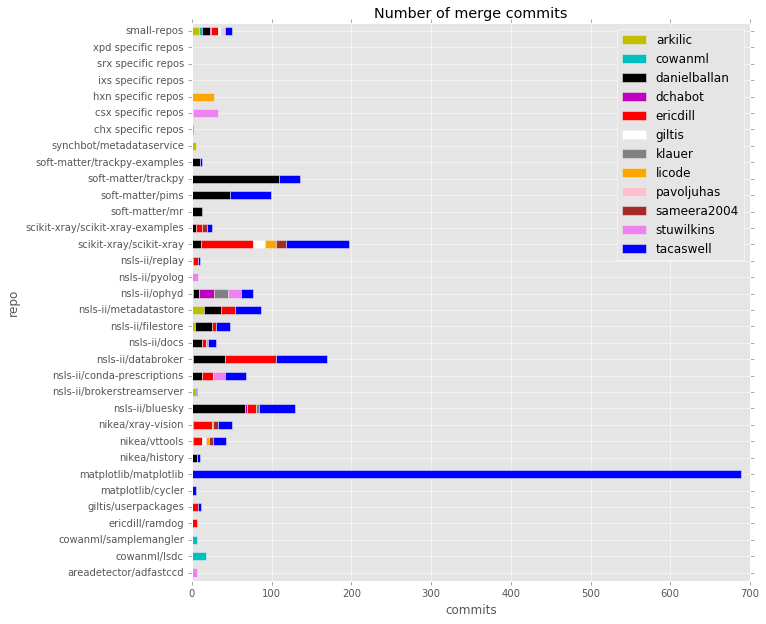

In [133]:
fig, ax = plt.subplots(figsize=(10,10))
cycle = ['y', 'c', 'k', 'm', 'r', 'white', 'gray', 'orange', 'pink', 'brown', 'violet', 'blue', 'green']
merge_commits_by_repo.plot(kind='barh', stacked=True, ax=ax, color=cycle, title="Number of merge commits")
ax.set_xlabel('commits')
plt.show()

In [134]:
merge_commits_by_repo.sum()

arkilic           40
cowanml           27
danielballan     401
dchabot           23
ericdill         252
giltis            22
klauer            23
licode            49
pavoljuhas         5
sameera2004       30
stuwilkins        82
tacaswell       1120
dtype: float64

In [135]:
merge_commits_by_repo

,arkilic,cowanml,danielballan,dchabot,ericdill,giltis,klauer,licode,pavoljuhas,sameera2004,stuwilkins,tacaswell
repo,,,,,,,,,,,,
areadetector/adfastccd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
cowanml/lsdc,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cowanml/samplemangler,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ericdill/ramdog,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
giltis/userpackages,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,4
matplotlib/cycler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
matplotlib/matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689
nikea/history,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
nikea/vttools,NaN,NaN,1,NaN,12,4,NaN,4,NaN,5,NaN,17
